# Basic usage of ESM-2 Protein language model

In [3]:
import torch
from transformers import AutoTokenizer, AutoModel
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


/home/ullahi/miniconda3/envs/llm/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Task 1: Model Loading and Inference
### Step 1: Load pre-trained ESM-2 model

In [4]:
model_name = "facebook/esm2_t33_650M_UR50D"  # Replace with your desired ESM-2 model variant
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(model_name, do_lower_case=False)
model = AutoModel.from_pretrained(model_name).to(device)

Some weights of EsmModel were not initialized from the model checkpoint at facebook/esm2_t33_650M_UR50D and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### Step 2: Process example protein sequences

In [10]:
# Example protein sequence (replace with your sequence)
protein_sequences = ["MKTLLILAVVCAIVSCQGQQNI"]  # Input protein sequences

# Tokenize the input sequences
inputs = tokenizer(protein_sequences, return_tensors="pt", padding=True, truncation=True)
inputs = {key: value.to(device) for key, value in inputs.items()}

### Step 3: Extract embeddings

In [11]:
with torch.no_grad():
    outputs = model(**inputs, output_attentions=True)

# Extract embeddings from the final hidden layer
embeddings = outputs.last_hidden_state  # Shape: [batch_size, seq_len, hidden_dim]
print(f"Embeddings shape: {embeddings.shape}")

Embeddings shape: torch.Size([1, 24, 1280])


## Task 2: Visualize attention patterns
### Step 4: Visualize attention patterns

In [12]:
# Visualize attention for the first head in the last layer
def visualize_attention(attention_matrix, sequence, head=0):
    """Visualizes the attention matrix."""
    attention_head = attention_matrix[head].cpu().numpy()  # Extract the attention for a specific head
    attention_head = attention_head[1: len(sequence) + 1, 1: len(sequence) + 1]  # Remove special tokens

    plt.figure(figsize=(10, 8))
    sns.heatmap(attention_head, xticklabels=list(sequence), yticklabels=list(sequence), cmap="coolwarm")
    plt.title(f"Attention Head {head + 1}")
    plt.xlabel("Input Tokens")
    plt.ylabel("Output Tokens")
    plt.show()

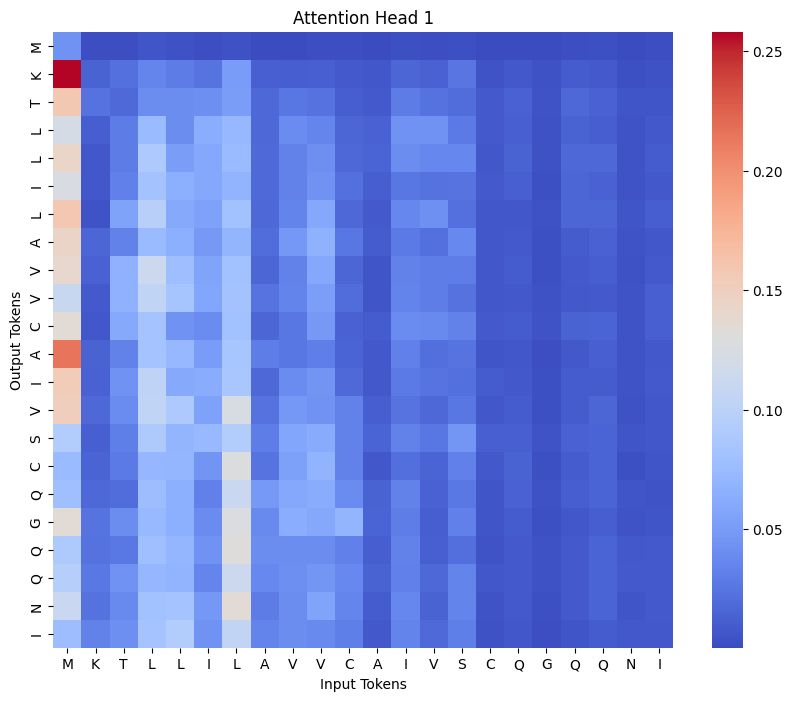

In [13]:
attentions = outputs.attentions  # A list of attention scores for each layer

# Get attention matrix for the last layer
attention_matrix = attentions[-1][0]  # Shape: [num_heads, seq_len, seq_len]

# Visualize attention for the first sequence
visualize_attention(attention_matrix, protein_sequences[0])